In [1]:
# Import useful libraries
import glob
import pandas as pd #data processing
import numpy as np #linear algebra
from IPython.display import display, HTML, Image
import os
from sklearn import preprocessing # change raw feature vectors into a more suitable representation 
from sklearn.impute import SimpleImputer # simple imputation
from sklearn.impute import KNNImputer # KNN imputation
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings#increase display windows to avoid scroll
display(HTML("<style>div.output_scroll { height: 60em; }</style>")) 
pd.options.display.float_format = lambda x: '{:.2e}'.format(x) if x > 1e3 else '{:.2f}'.format(x)
####graphs
import matplotlib.pyplot as plt
import numpy as np
from pylab import plot,title,xlabel, ylabel

### Geography
from geopy.distance import geodesic



In [2]:
#increase display windows to avoid scroll
display(HTML("<style>div.output_scroll { height: 60em; }</style>")) 
pd.options.display.float_format = lambda x: '{:.2e}'.format(x) if x > 1e3 else '{:.2f}'.format(x)

# Geat data

## pollutants

In [3]:
directory_pollutants = '/Users/elenamicossi/Library/CloudStorage/OneDrive-Personal/DATAFR/'
file_name_pollutants = 'fr-2023-d-lcsqa-ineris-20230717.xls'
file_path_pollutants = os.path.join(directory_pollutants, file_name_pollutants)

df_p = pd.read_excel(file_path_pollutants ,sheet_name='AirQualityStations')


## meteo

In [4]:
directory_meteo = '/Users/elenamicossi/Library/CloudStorage/OneDrive-Personal/DATAFR/METEO'
file_name_meteo= 'data_meteo_stations.csv'
file_path_meteo = os.path.join(directory_meteo, file_name_meteo)

meteo_stations=pd.read_csv(file_path_meteo,sep=',')


# Output setup

In [5]:
directory_out = '/Users/elenamicossi/Library/CloudStorage/OneDrive-Personal/DATAFR/OUTPUT/'
file_name_out = 'table_correspondances_stations.csv'
file_path_out = os.path.join(directory_out, file_name_out)

# POLLUTANTS

## file with info stations

In [6]:
df_p.shape

(862, 17)

In [7]:
df_p.head(10)

,GMLID,LocalId,Namespace,Version,NatlStationCode,Name,Municipality,EUStationCode,ActivityBegin,ActivityEnd,Latitude,Longitude,SRSName,Altitude,AltitudeUnit,AreaClassification,BelongsTo
0,STA-FR01001,STA-FR01001,FR.LCSQA-INERIS.AQ,1,FR01001,Longlaville-Ecole,LONGLAVILLE,FR01001,1993-01-01T00:00:00+01:00,2014-11-04T00:00:00+01:00,49.54,5.80,urn:ogc:def:crs:EPSG::4326,265,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
1,STA-FR01004,STA-FR01004,FR.LCSQA-INERIS.AQ,1,FR01004,Distroff,DISTROFF,FR01004,1992-07-01T00:00:00+01:00,2013-06-29T00:00:00+01:00,49.33,6.27,urn:ogc:def:crs:EPSG::4326,223,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
2,STA-FR01005,STA-FR01005,FR.LCSQA-INERIS.AQ,2,FR01005,Hayange,HAYANGE,FR01005,1990-06-01T00:00:00+01:00,2021-01-18T00:00:00+01:00,49.32,6.08,urn:ogc:def:crs:EPSG::4326,187,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
3,STA-FR01006,STA-FR01006,FR.LCSQA-INERIS.AQ,1,FR01006,Florange,FLORANGE,FR01006,1988-07-01T00:00:00+01:00,2016-01-07T00:00:00+01:00,49.32,6.14,urn:ogc:def:crs:EPSG::4326,158,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
4,STA-FR01009,STA-FR01009,FR.LCSQA-INERIS.AQ,2,FR01009,Gandrange,GANDRANGE,FR01009,1993-01-01T00:00:00+01:00,2018-04-13T00:00:00+01:00,49.27,6.13,urn:ogc:def:crs:EPSG::4326,180,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
5,STA-FR01010,STA-FR01010,FR.LCSQA-INERIS.AQ,1,FR01010,La Maxe,LA MAXE,FR01010,1990-06-01T00:00:00+01:00,2013-01-03T00:00:00+01:00,49.16,6.19,urn:ogc:def:crs:EPSG::4326,165,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
6,STA-FR01011,STA-FR01011,FR.LCSQA-INERIS.AQ,2,FR01011,Metz-Centre,METZ,FR01011,1989-01-01T00:00:00+01:00,NaN,49.12,6.18,urn:ogc:def:crs:EPSG::4326,192,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
7,STA-FR01012,STA-FR01012,FR.LCSQA-INERIS.AQ,2,FR01012,Metz-Borny,METZ,FR01012,1991-01-01T00:00:00+01:00,NaN,49.11,6.22,urn:ogc:def:crs:EPSG::4326,204,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
8,STA-FR01014,STA-FR01014,FR.LCSQA-INERIS.AQ,2,FR01014,Pont-à-Mousson,PONT-À-MOUSSON,FR01014,1990-09-01T00:00:00+01:00,NaN,48.91,6.06,urn:ogc:def:crs:EPSG::4326,179,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
9,STA-FR01015,STA-FR01015,FR.LCSQA-INERIS.AQ,2,FR01015,Blénod-lès-PAM,BLÉNOD-LÈS-PONT-À-MOUSSON,FR01015,1990-07-01T00:00:00+01:00,2022-04-19T00:00:00+01:00,48.88,6.05,urn:ogc:def:crs:EPSG::4326,186,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A


In [8]:
df_p.columns

Index(['GMLID', 'LocalId', 'Namespace', 'Version', 'NatlStationCode', 'Name',
       'Municipality', 'EUStationCode', 'ActivityBegin', 'ActivityEnd',
       'Latitude', 'Longitude', 'SRSName', 'Altitude', 'AltitudeUnit',
       'AreaClassification', 'BelongsTo'],
      dtype='object')

In [9]:
#Selection of France metropolitaine
dfp_fm = df_p[(df_p['Longitude'] > -20) & (df_p['Longitude'] < 20)]

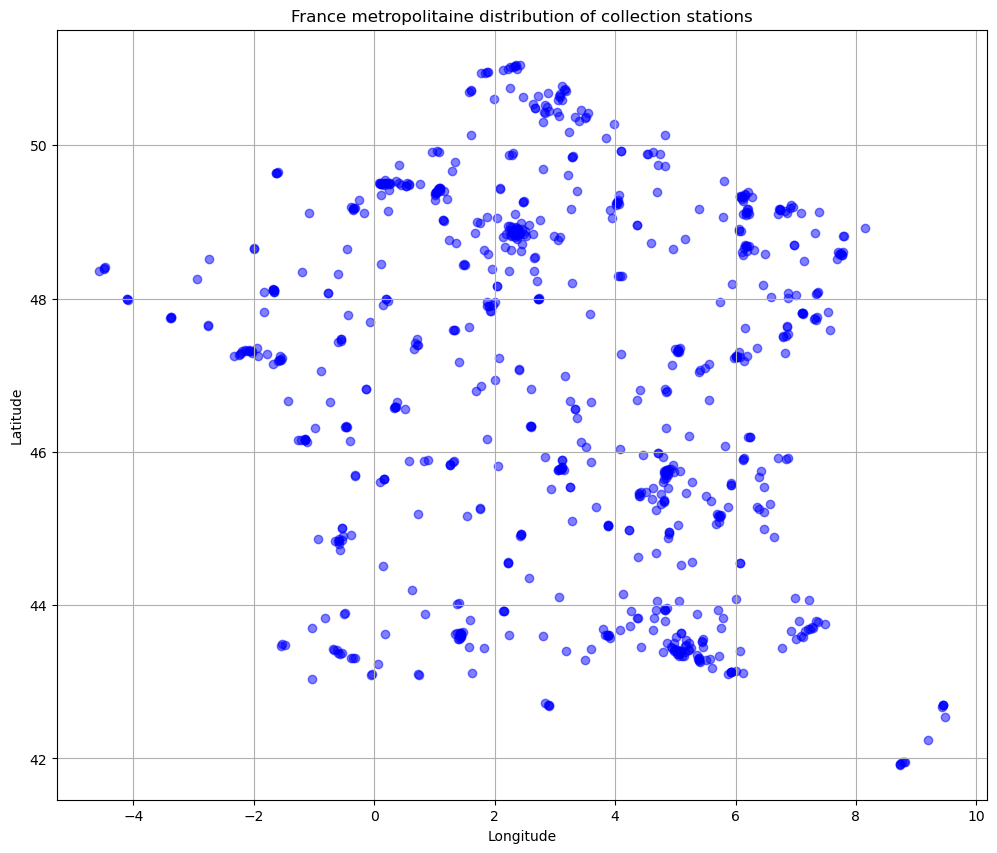

In [10]:
plt.figure(figsize=(12, 10))
plt.scatter(dfp_fm['Longitude'], dfp_fm['Latitude'], c='blue', marker='o', alpha=0.5)

plt.title('France metropolitaine distribution of collection stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Mostra il grafico
plt.show()

In [11]:
dfp_fm.describe()

,Version,Latitude,Longitude,Altitude
count,808.00,808.00,808.00,808.00
mean,1.91,46.92,3.09,173.18
std,0.61,2.35,2.82,227.24
min,1.00,41.92,-4.57,0.00
25%,2.00,45.01,1.10,33.00
50%,2.00,47.30,3.08,106.50
75%,2.00,48.92,5.26,218.25
max,5.00,51.05,9.48,2.27e+03


In [12]:
# Check percentage of currently working pollutants stations
current_active_stations=dfp_fm['ActivityEnd'].isna().sum()/len(dfp_fm['ActivityEnd'])*100
print('Percentage of currently working stations : ' , current_active_stations, ' %')

Percentage of currently working stations :  64.35643564356435  %


In [13]:
dfp_fm['ActivityEnd'].isna().sum()

520

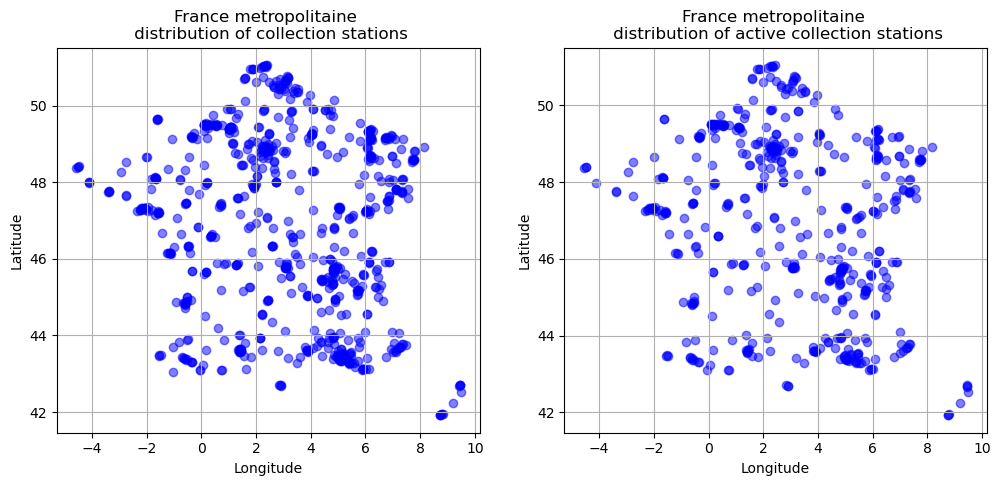

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.scatter(dfp_fm['Longitude'], dfp_fm['Latitude'], c='blue', marker='o', alpha=0.5)

plt.title('France metropolitaine \n distribution of collection stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(dfp_fm.loc[dfp_fm['ActivityEnd'].isna(),'Longitude'], dfp_fm.loc[dfp_fm['ActivityEnd'].isna(),'Latitude'], c='blue', marker='o', alpha=0.5)
plt.title('France metropolitaine \n distribution of active collection stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

In [15]:
#filter for stations whose activity stopped before 2017 (meteo data availability) and that are still active 
dfp_fm['ActivityEnd'] = pd.to_datetime(dfp_fm['ActivityEnd'])
dfp_fm_plus2017 = dfp_fm[(dfp_fm['ActivityEnd'].dt.year >= 2017) | (dfp_fm['ActivityEnd'].isna())]

/var/folders/8n/ln9nz0vd6qd42fxj13938y840000gn/T/ipykernel_70870/1165163254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_fm['ActivityEnd'] = pd.to_datetime(dfp_fm['ActivityEnd'])


In [16]:
dfp_fm_plus2017.head()

,GMLID,LocalId,Namespace,Version,NatlStationCode,Name,Municipality,EUStationCode,ActivityBegin,ActivityEnd,Latitude,Longitude,SRSName,Altitude,AltitudeUnit,AreaClassification,BelongsTo
2,STA-FR01005,STA-FR01005,FR.LCSQA-INERIS.AQ,2,FR01005,Hayange,HAYANGE,FR01005,1990-06-01T00:00:00+01:00,2021-01-18 00:00:00+01:00,49.32,6.08,urn:ogc:def:crs:EPSG::4326,187,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
4,STA-FR01009,STA-FR01009,FR.LCSQA-INERIS.AQ,2,FR01009,Gandrange,GANDRANGE,FR01009,1993-01-01T00:00:00+01:00,2018-04-13 00:00:00+01:00,49.27,6.13,urn:ogc:def:crs:EPSG::4326,180,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
6,STA-FR01011,STA-FR01011,FR.LCSQA-INERIS.AQ,2,FR01011,Metz-Centre,METZ,FR01011,1989-01-01T00:00:00+01:00,NaT,49.12,6.18,urn:ogc:def:crs:EPSG::4326,192,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
7,STA-FR01012,STA-FR01012,FR.LCSQA-INERIS.AQ,2,FR01012,Metz-Borny,METZ,FR01012,1991-01-01T00:00:00+01:00,NaT,49.11,6.22,urn:ogc:def:crs:EPSG::4326,204,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A
8,STA-FR01014,STA-FR01014,FR.LCSQA-INERIS.AQ,2,FR01014,Pont-à-Mousson,PONT-À-MOUSSON,FR01014,1990-09-01T00:00:00+01:00,NaT,48.91,6.06,urn:ogc:def:crs:EPSG::4326,179,http://dd.eionet.europa.eu/vocabulary/uom/leng...,http://dd.eionet.europa.eu/vocabulary/aq/areac...,FR.LCSQA-INERIS.AQ/NET-FR075A


In [17]:
dfp_fm_plus2017.shape

(681, 17)

In [18]:
current_active_stations=dfp_fm_plus2017['ActivityEnd'].isna().sum()/len(dfp_fm_plus2017['ActivityEnd'])*100
print('Percentage of currently working stations : ' , current_active_stations, ' %')

Percentage of currently working stations :  76.3582966226138  %


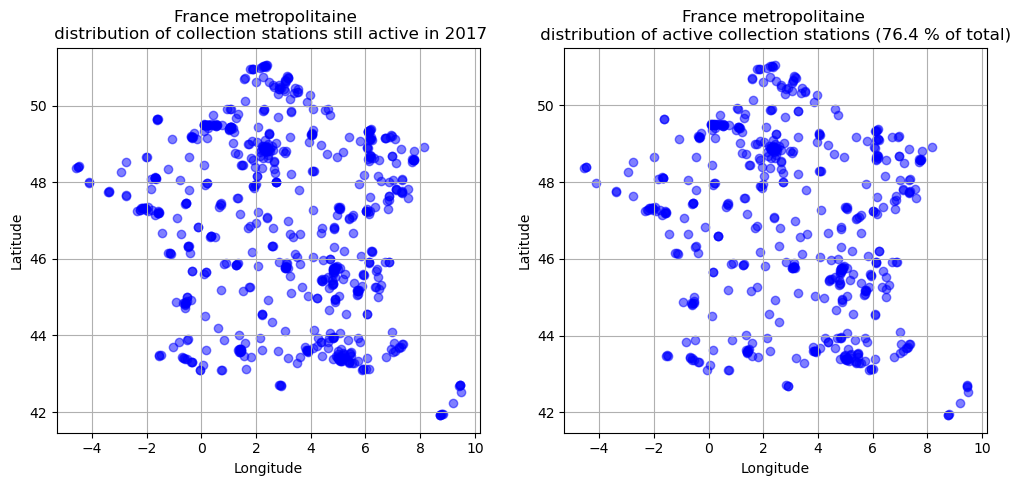

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.scatter(dfp_fm_plus2017['Longitude'],
            dfp_fm_plus2017['Latitude'],
            c='blue', marker='o', alpha=0.5)

plt.title('France metropolitaine \n distribution of collection stations still active in 2017')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(dfp_fm_plus2017.loc[dfp_fm_plus2017['ActivityEnd'].isna(),'Longitude'],
            dfp_fm_plus2017.loc[dfp_fm_plus2017['ActivityEnd'].isna(),'Latitude'],
            c='blue', marker='o', alpha=0.5)
plt.title('France metropolitaine \n distribution of active collection stations (76.4 % of total) ')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

In [20]:
dfp_fm_plus2017.shape

(681, 17)

In [21]:
dfp_fm_plus2017['AreaClassification'].unique()

array(['http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/suburban',
       'http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/urban',
       'http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/rural-nearcity',
       'http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/rural-regional',
       'http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/rural-remote',
       'http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/rural'],
      dtype=object)

In [22]:
dfp_fm_plus2017['AreaClassification'] = dfp_fm_plus2017['AreaClassification'].str.replace('http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/', '', regex=False)


/var/folders/8n/ln9nz0vd6qd42fxj13938y840000gn/T/ipykernel_70870/3338016456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_fm_plus2017['AreaClassification'] = dfp_fm_plus2017['AreaClassification'].str.replace('http://dd.eionet.europa.eu/vocabulary/aq/areaclassification/', '', regex=False)


In [23]:
dfp_fm_plus2017['AltitudeUnit'].unique()

array(['http://dd.eionet.europa.eu/vocabulary/uom/length/m'], dtype=object)

In [24]:
# all altitudes are in meters so I remove the column and change altitude column name
dfp_fm_plus2017.drop(columns='AltitudeUnit', inplace= True)

/var/folders/8n/ln9nz0vd6qd42fxj13938y840000gn/T/ipykernel_70870/1742202874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_fm_plus2017.drop(columns='AltitudeUnit', inplace= True)


In [25]:
dfp_fm_plus2017.rename(columns={'Altitude': 'Altitude in m'}, inplace=True)

/var/folders/8n/ln9nz0vd6qd42fxj13938y840000gn/T/ipykernel_70870/194235387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp_fm_plus2017.rename(columns={'Altitude': 'Altitude in m'}, inplace=True)


In [26]:
# filter for active stations to avoid data leakage of the model
dfp_fm_2017_active=dfp_fm_plus2017.loc[dfp_fm_plus2017['ActivityEnd'].isna()]

In [27]:
dfp_fm_2017_active.shape

(520, 16)

In [28]:
pollutants_stations = dfp_fm_2017_active[['EUStationCode', 'Name', 'Latitude', 'Longitude']].drop_duplicates().reset_index(drop=True)

In [29]:
pollutants_stations.shape

(520, 4)

In [30]:
pollutants_stations.head()

,EUStationCode,Name,Latitude,Longitude
0,FR01011,Metz-Centre,49.12,6.18
1,FR01012,Metz-Borny,49.11,6.22
2,FR01014,Pont-à-Mousson,48.91,6.06
3,FR01016,Atton,48.89,6.09
4,FR01018,Scy-Chazelles,49.11,6.12


# METEO

In [31]:
meteo_stations.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI
0,1014002,ARBENT,46.28,5.67,534
1,1027003,BALAN_AERO,45.83,5.11,196
2,1033002,BELLEGARDE,46.09,5.81,350
3,1034004,BELLEY,45.77,5.69,330
4,1064001,VERIZIEU,45.78,5.49,281


In [32]:
meteo_stations.shape

(3652, 5)

In [33]:
len(meteo_stations['NUM_POSTE'].unique())

3623

In [34]:
meteo_stations.drop_duplicates(subset=['NUM_POSTE'], keep='first', inplace=True)

In [35]:
meteo_stations.shape

(3623, 5)

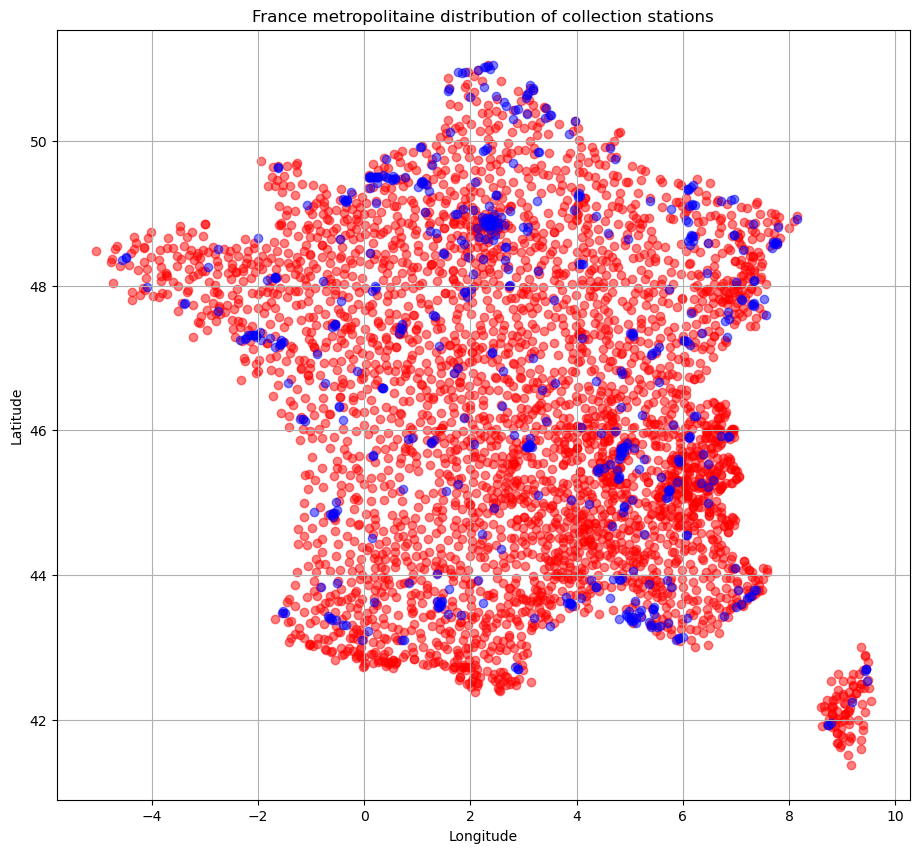

In [36]:
plt.figure(figsize=(11, 10))
plt.scatter(meteo_stations['LON'], meteo_stations['LAT'], c='red', marker='o', alpha=0.5)

plt.title('France metropolitaine distribution of collection stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(pollutants_stations['Longitude'], pollutants_stations['Latitude'], c='blue', marker='o', alpha=0.5)

plt.grid(True)

# Mostra il grafico
plt.show()

In [37]:
def connect_stations(meteo_df, pollutant_df, threshold_km):
    connections = []
    for meteo_index, meteo_row in meteo_df.iterrows():
        meteo_location = (meteo_row['LAT'], meteo_row['LON'])
        for pollutant_index, pollutant_row in pollutant_df.iterrows():
            pollutant_location = (pollutant_row['Latitude'], pollutant_row['Longitude'])
            distance = geodesic(meteo_location, pollutant_location).kilometers
            if distance <= threshold_km:
                connections.append({
                    'meteo_station_id': meteo_row['NUM_POSTE'],
                    'meteo_station_name' : meteo_row['NOM_USUEL'],
                    'pollutant_station_id': pollutant_row['EUStationCode'],
                    'pollutant_station_name': pollutant_row['Name'],
                    'distance_km': distance
                })
    return pd.DataFrame(connections)

# Set the threshold distance
threshold_distance = 16  # in kilometers
connections_df = connect_stations(meteo_stations, pollutants_stations, threshold_distance)

# Display the connections DataFrame
connections_df.head()

,meteo_station_id,meteo_station_name,pollutant_station_id,pollutant_station_name,distance_km
0,1027003,BALAN_AERO,FR20046,VAULX EN VELIN,15.37
1,1027003,BALAN_AERO,FR20047,COTIERE AIN,11.92
2,1027003,BALAN_AERO,FR20048,SAINT EXUPERY,9.25
3,1033002,BELLEGARDE,FR33302,St Germain/Rhône,1.67
4,1072001,CEYZERIAT_SAPC,FR33305,Bourg-en-Bresse,4.80


In [48]:
duplicates = connections_df[connections_df.duplicated(subset='pollutant_station_id', keep=False)]
duplicates.sort_values(by='pollutant_station_id',inplace=True)

/var/folders/8n/ln9nz0vd6qd42fxj13938y840000gn/T/ipykernel_70870/4096581803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.sort_values(by='pollutant_station_id',inplace=True)


In [49]:
duplicates.head()

,meteo_station_id,meteo_station_name,pollutant_station_id,pollutant_station_name,distance_km
1399,57039001,METZ-FRESCATY,FR01011,Metz-Centre,6.88
1393,57019001,MALANCOURT,FR01011,Metz-Centre,14.27
1433,57578001,REZONVILLE,FR01011,Metz-Centre,14.16
1409,57153001,CORNY-SUR-MOSELLE,FR01011,Metz-Centre,13.40
1400,57039001,METZ-FRESCATY,FR01012,Metz-Borny,8.47


In [52]:
# Find the minimum value in 'distance_km' for each group in 'pollutant_station_id'
min_values = connections_df.groupby('pollutant_station_id')['distance_km'].transform('min')
connections = connections_df[connections_df['distance_km'] == min_values].reset_index(drop=True)

connections.sort_values(by='pollutant_station_id',inplace=True)

In [57]:
connections.shape

(520, 5)

In [53]:
connections.head()

,meteo_station_id,meteo_station_name,pollutant_station_id,pollutant_station_name,distance_km
260,57039001,METZ-FRESCATY,FR01011,Metz-Centre,6.88
261,57039001,METZ-FRESCATY,FR01012,Metz-Borny,8.47
248,54415001,PAGNY-SUR-MOSELLE,FR01014,Pont-à-Mousson,7.91
249,54415001,PAGNY-SUR-MOSELLE,FR01016,Atton,11.76
262,57039001,METZ-FRESCATY,FR01018,Scy-Chazelles,4.23


In [54]:
duplicates_meteo = connections[connections.duplicated(subset='meteo_station_id', keep=False)]

In [55]:
duplicates_meteo.shape


(293, 5)

In [56]:
# Save the connections to a CSV file
connections.to_csv(file_path_out, index=False)